In [10]:
%pip install -r requirements.txt
%pip install -e .

Note: you may need to restart the kernel to use updated packages.
Obtaining file:///Users/arjunraj/code/l-metric
  Preparing metadata (setup.py) ... done
  Attempting uninstall: l-metric-calculator
    Found existing installation: l-metric-calculator 0.1.0
    Uninstalling l-metric-calculator-0.1.0:
      Successfully uninstalled l-metric-calculator-0.1.0
  Running setup.py develop for l-metric-calculator
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pprint
import pandas as pd
from l_metric_calculator.l_metric_calculator import LMetricCalculator

/var/folders/nz/4qmybzbj3nsfhgp1q_7dxz8h0000gn/T/ipykernel_73390/392476187.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the gene expression data
df = pd.read_csv('output_file.csv')

# Initialize the LMetricCalculator with the DataFrame
calculator = LMetricCalculator(df)


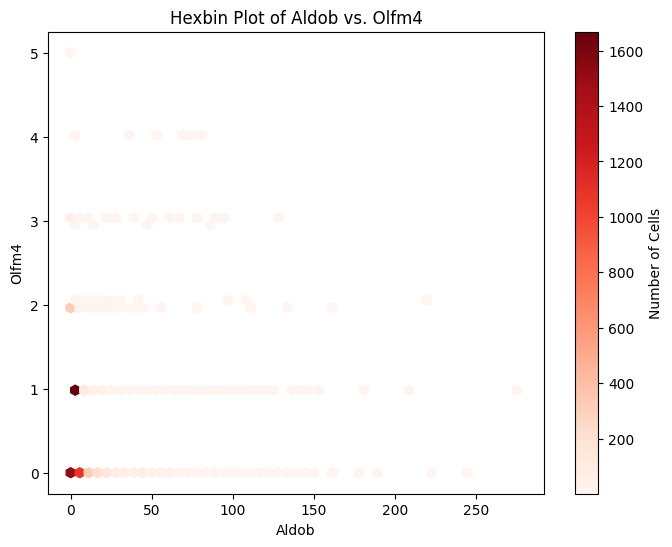

In [4]:
calculator.plot_hexbin('Aldob', 'Olfm4')

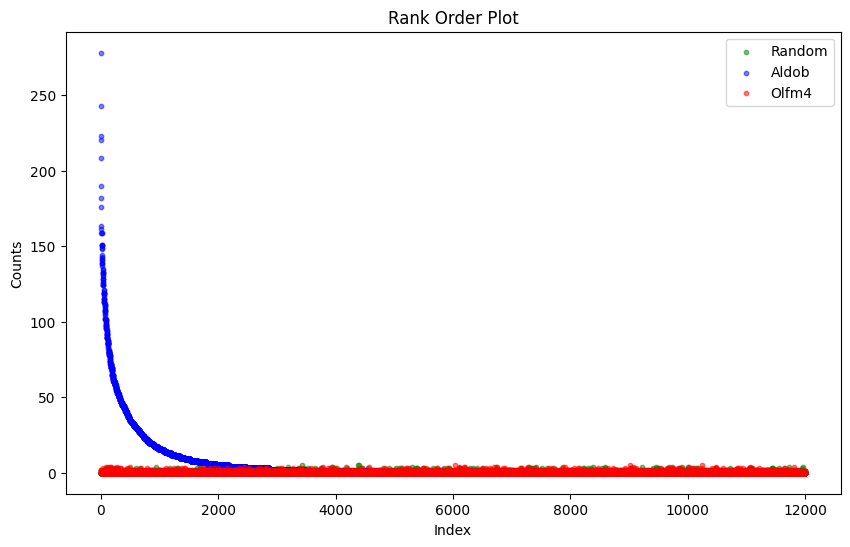

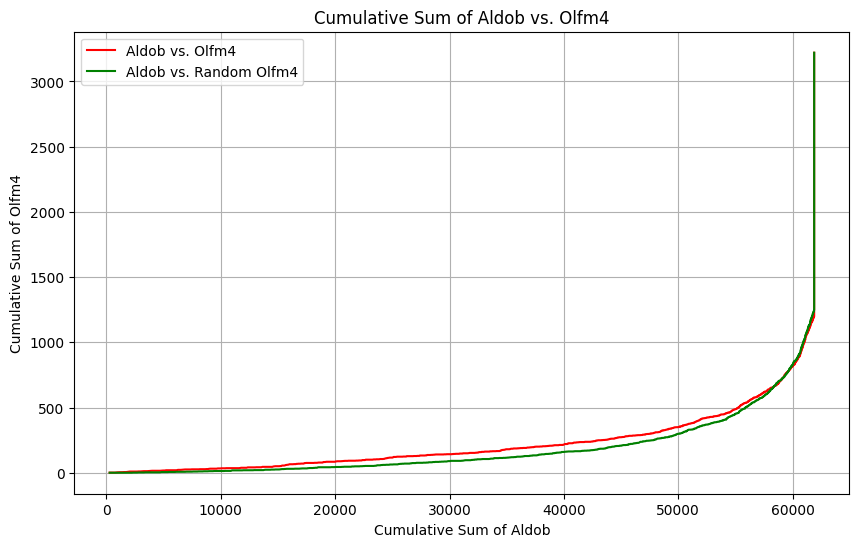

In [5]:
calculator.plot_rank_orders('Aldob', 'Olfm4')

In [6]:

# Compute pairwise L-Metrics for all genes
calculator.compute_pairwise_l_metrics()
pprint.pprint(calculator.l_metric_matrix.head())


Computing Pairwise L-Metrics:   0%|          | 0/19460 [00:00<?, ?it/s]

Computing Pairwise L-Metrics: 100%|██████████| 19460/19460 [00:17<00:00, 1100.30it/s]

            Ada      Add3     Adh6a      Agr2     Ahnak   Aldh1b1     Aldob  \
Ada    0.000000 -0.003923  0.014502 -0.004240 -0.029319 -0.016358  0.167350   
Add3  -0.026002  0.000000  0.103120  0.058049  0.007120  0.066018  0.092605   
Adh6a  0.004751  0.013773  0.000000  0.004566  0.004639  0.022020  0.044663   
Agr2  -0.008963  0.011200  0.007960  0.000000 -0.004403  0.008539  0.026235   
Ahnak -0.160294  0.009285  0.057633 -0.083321  0.000000  0.077023 -0.201202   

           Alpi      Ang4     Anxa1  ...      Tff3   Tm4sf20    Tm4sf4  \
Ada    0.198462 -0.012872 -0.030355  ... -0.005849  0.139456  0.108225   
Add3   0.082797  0.010281  0.011654  ...  0.022178  0.088759  0.023851   
Adh6a  0.037729  0.006607  0.017585  ...  0.004498  0.063108  0.005740   
Agr2  -0.001250  0.041113 -0.009918  ...  0.141852  0.021258  0.008406   
Ahnak -0.147670  0.105930  0.181268  ...  0.017742 -0.117272 -0.038231   

           Tph1    Tuba1a    Txndc5       Vim      Yap1   Zfp36l2      Zg16  
Ad

In [10]:

# Perform hierarchical clustering using the average linkage method and Euclidean distance
calculator.perform_clustering(method='average', metric='euclidean')

# Plot the interactive clustered heatmap
calculator.plot_heatmap(interactive=True)